Theta values are:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]

p(C = c1 | X =t) values are:  [0.0, 0.091, 0.167, 0.231, 0.286, 0.333, 0.375, 0.412, 0.444, 0.474, 0.5, 0.524, 0.545, 0.565, 0.583, 0.6, 0.615, 0.63, 0.643, 0.655]


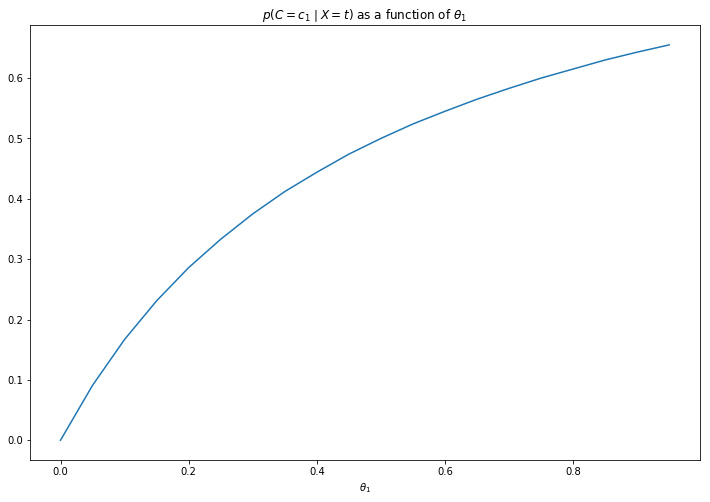

In [2]:
## ML: Advanced Probabilistic Methods
## Exercise 1, Problem 1: Coins
import matplotlib.pyplot as plt
import numpy as np

# define some variables:
theta_2 = 0.5
pi_1 = 0.5

# compute posterior probability of c_1
theta_1 = np.linspace(0,1, num=20, endpoint=False)
post_c1 = []
for i in theta_1:
    post_c1.append(np.round((i*pi_1)/(i*pi_1 + theta_2 - pi_1*theta_2),3))
                            
print('Theta values are: ', theta_1)
print('\np(C = c1 | X =t) values are: ', post_c1)
# plot the result
plt.figure(figsize=(12,8))
plt.plot(theta_1, post_c1)
plt.title('$p(C = c_1 \\mid X = t)$ as a function of $\\theta_1$')
plt.xlabel('$\\theta_1$')
plt.show()

In [1]:
##EXERCISiE 3
#Problem 2
import numpy as np
import random

N = 10
np.random.seed(5)

#Generate 10 observations
mean = [0,0]
sigma = [[1,0],[0,1]]
data = np.random.multivariate_normal(mean, sigma, 10) #numpy provides this function that it generates the variables matrix
print('The simulated variables are: \n',data)

#Maximum Likelihood
print('\n1. Maximum Likelihood:')
ML_mean = 1/N * np.sum(data, axis = 0)
print('Mean: \n', ML_mean)

_data = data.copy()
_data -= _data.mean(axis = 0)
ML_sigma = 1/ N * _data.T @ _data
print('Covariance Matrix: \n', ML_sigma)

#Bayesian Posterior
print('\n2. Bayesian Posterior:')
mean = np.array([[0,0]]).T
sigma = np.array([[1,0],[0,1]])
m0 = np.array([[0,0]]).T
S0 = np.array([[0.1,0],[0,0.1]])

pos_sigma = np.linalg.inv((N * np.linalg.inv(sigma) + np.linalg.inv(S0)))
pos_mean = pos_sigma @ (np.linalg.inv(sigma) @ np.reshape(np.sum(data, axis = 0), (np.sum(data, axis = 0).shape[0],1)) + np.linalg.inv(S0) @ m0)

print('Mean: \n',pos_mean.T)
print('Covariance Matrix: \n',pos_sigma)

The simulated variables are: 
 [[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]

1. Maximum Likelihood:
Mean: 
 [-0.13161913  0.22786068]
Covariance Matrix: 
 [[1.47363386 0.25481573]
 [0.25481573 0.7378825 ]]

2. Bayesian Posterior:
Mean: 
 [[-0.06580957  0.11393034]]
Covariance Matrix: 
 [[0.05 0.  ]
 [0.   0.05]]


In [300]:
#Problem 3
#Wishart distribution

import scipy.stats


A = np.array([[2, 0.3],[0.3, 0.5]]) #precision matrix of the multivariate normal distribution


#b
v = 2 #more than p (=2) - 1
W = A / v
print('The scale matrix:')
print(W)

print('\nSimulation of Wishart Distribution: The mean matrix')
print('\n1. Varying the sample size (degree of freedom fixed = 2):')
sizes = [1,10,1000]
for size in sizes:
    print('\nFor %s samples:' % size)
    wishart = scipy.stats.wishart.rvs(v,W,size, random_state = 5)
    if size != 1:
        print(np.mean(wishart, axis = 0))
    elif size == 1:
        print(wishart)
        
#c
print('\n2. Varying degree of freedom (sample size fixed = 50) :')
vs = [2,20,200,2000]
size = 50
for v in vs:
    W = A / v
    print('\nFor degree of freedom of %s:' % v)
    wishart = scipy.stats.wishart.rvs(v,W,size, random_state = 5)
    print(np.mean(wishart, axis = 0))

The scale matrix:
[[1.   0.15]
 [0.15 0.25]]

Simulation of Wishart Distribution: The mean matrix

1. Varying the sample size (degree of freedom fixed = 2):

For 1 samples:
[[0.46315593 0.21269774]
 [0.21269774 0.99929394]]

For 10 samples:
[[1.43274053 0.42763495]
 [0.42763495 0.44792232]]

For 1000 samples:
[[2.03866512 0.33413889]
 [0.33413889 0.51349856]]

2. Varying degree of freedom (sample size fixed = 50) :

For degree of freedom of 2:
[[2.20493495 0.32515555]
 [0.32515555 0.41953387]]

For degree of freedom of 20:
[[2.04055759 0.3200758 ]
 [0.3200758  0.51223015]]

For degree of freedom of 200:
[[2.00881455 0.30718032]
 [0.30718032 0.50497034]]

For degree of freedom of 2000:
[[2.00239093 0.3023514 ]
 [0.3023514  0.5017859 ]]
